<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import gensim
import pyLDAvis.gensim
import re
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore
import spacy


In [2]:
df = pd.read_csv('./data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [3]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [5]:
df.shape

(28332, 24)

In [8]:
nlp = spacy.load("en_core_web_lg")

STOP_WORDS = nlp.Defaults.stop_words.union(['check-in','I', 'i', 'stars', 'it', "it's", 'it.', 'the', 'this','below','.','!',',','amazon'])

In [6]:
def get_lemmas(text):
    
    lemmas = []
    
    doc = nlp(text)
    
    for token in doc:
        conditions = (token.is_stop == False) and (token.is_punct == False) and (token.pos_ != 'PRON') and (token is not STOP_WORDS)
        if conditions:
            lemmas.append(token.lemma_)

    return lemmas

In [9]:
df['lemmas'] = df['reviews.text'].apply(get_lemmas)

In [11]:
id2word = corpora.Dictionary(df.lemmas)
len(id2word.keys())
type(id2word)

gensim.corpora.dictionary.Dictionary

In [12]:
id2word.filter_extremes(no_below=5, no_above=.95)

In [13]:
corpus = [id2word.doc2bow(doc) for doc in df.lemmas]

In [14]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=8,
                   num_topics = 10 
                  )

In [15]:
lda.print_topics()

[(0,
  '0.058*"good" + 0.032*"great" + 0.027*"tablet" + 0.026*"battery" + 0.018*"love" + 0.017*"work" + 0.014*"buy" + 0.013*"use" + 0.012*"price" + 0.012*"product"'),
 (1,
  '0.040*"tablet" + 0.030*"love" + 0.025*"great" + 0.021*"buy" + 0.016*"use" + 0.016*"price" + 0.015*"battery" + 0.013*"easy" + 0.013*"good" + 0.010*"old"'),
 (2,
  '0.041*"battery" + 0.025*"great" + 0.021*"price" + 0.018*"use" + 0.017*"long" + 0.016*"good" + 0.014*"buy" + 0.011*"work" + 0.010*"tablet" + 0.010*"love"'),
 (3,
  '0.033*"battery" + 0.024*"buy" + 0.023*"great" + 0.022*"love" + 0.017*"tablet" + 0.016*"good" + 0.012*"use" + 0.012*"price" + 0.012*"product" + 0.012*"kid"'),
 (4,
  '0.087*"battery" + 0.051*"price" + 0.031*"great" + 0.031*"good" + 0.016*"long" + 0.014*"brand" + 0.012*"work" + 0.011*"buy" + 0.010*"Amazon" + 0.010*"easy"'),
 (5,
  '0.045*"battery" + 0.028*"good" + 0.027*"work" + 0.019*"great" + 0.016*"love" + 0.016*"like" + 0.014*"price" + 0.014*"buy" + 0.012*"Amazon" + 0.011*"tablet"'),
 (6,
  

In [16]:
words = [re.findall('"([^"]*)"',t[1]) for t in lda.print_topics()]

In [17]:
topics = [' '.join(t[0:5]) for t in words]

In [18]:
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
good great tablet battery love

------ Topic 1 ------
tablet love great buy use

------ Topic 2 ------
battery great price use long

------ Topic 3 ------
battery buy great love tablet

------ Topic 4 ------
battery price great good long

------ Topic 5 ------
battery good work great love

------ Topic 6 ------
great battery use buy love

------ Topic 7 ------
buy great tablet work battery

------ Topic 8 ------
great battery work tablet love

------ Topic 9 ------
battery great good tablet use



In [19]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [20]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.028388  0.007597       1        1  13.715317
4      0.038532  0.002261       2        1  12.339962
8     -0.006768 -0.014474       3        1  10.095550
0     -0.006249 -0.005931       4        1   9.928782
7     -0.015401 -0.003650       5        1   9.913086
3     -0.004812  0.005027       6        1   9.584837
6     -0.006605  0.009794       7        1   9.145386
5      0.008341 -0.008303       8        1   8.662056
9      0.009306 -0.001077       9        1   8.509246
2      0.012046  0.008755      10        1   8.105787, topic_info=         Term          Freq         Total Category  logprob  loglift
3     battery  11718.000000  11718.000000  Default  30.0000  30.0000
32       good   7230.000000   7230.000000  Default  29.0000  29.0000
18      price   5886.000000   5886.000000  Default  28.0000  28.0000
10       work   4842.000000   4842.000000  Default  27.0000  27.0000
21      great   9413.000000   9413.000000  Default  26.0000  26.0000
..        ...           ...           ...      ...      ...      ...
31       easy    158.964798   3031.487549  Topic10  -5.0862  -0.4355
481       old    141.763153   2236.657471  Topic10  -5.2008  -0.2460
708      read    127.981842   1833.621460  Topic10  -5.3030  -0.1496
37   purchase    138.472946   2487.811523  Topic10  -5.2242  -0.3759
215    device    114.980553   1342.082520  Topic10  -5.4102   0.0554

[797 rows x 6 columns], token_table=      Topic      Freq Term
term                      
375       1  0.112012    1
375       2  0.082972    1
375       3  0.153498    1
375       4  0.095418    1
375       5  0.082972    1
...     ...       ...  ...
1022      6  0.071357  yup
1022      7  0.071357  yup
1022      8  0.071357  yup
1022      9  0.071357  yup
1022     10  0.071357  yup

[3971 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 9, 1, 8, 4, 7, 6, 10, 3])

In [21]:
doc_topics = [lda[doc] for doc in corpus]

In [22]:
def update(doc):
        d_dist = {k:0 for k in range(0,5)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in doc_topics]

In [23]:
dft = pd.DataFrame.from_records(new_distro)
dft.columns = topics

In [24]:
dft.head()

,good great tablet battery love,tablet love great buy use,battery great price use long,battery buy great love tablet,battery price great good long,battery good work great love,great battery use buy love,buy great tablet work battery,great battery work tablet love,battery great good tablet use
0,0.000000,0.010886,0.088741,0.116161,0.158479,0.152448,0.021565,0.019028,0.413045,NaN
1,0.026825,0.016911,0.016732,0.350658,0.016751,0.030514,0.469586,0.016675,0.038673,0.016674
2,0.025027,0.025010,0.025010,0.025006,0.685468,0.025021,0.114437,0.025006,0.025008,0.025007
3,0.016671,0.016669,0.016690,0.016669,0.842416,0.024157,0.016670,0.016681,0.016706,0.016671
4,0.016669,0.016669,0.017674,0.016669,0.845920,0.016670,0.016670,0.016674,0.019716,0.016669


In [25]:
df['primary_topic'] = dft.idxmax(axis=1)

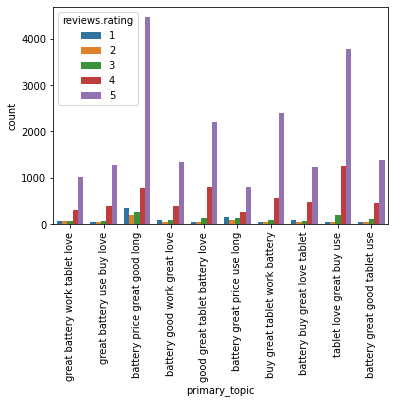

In [27]:
ax = sns.countplot(x="primary_topic", hue="reviews.rating", data=df)
plt.xticks(rotation=90)
plt.show()

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling